 Prueba carga datos y gráficos

In [122]:

!pip install git+git://github.com/geopandas/geopandas.git
!apt install proj-bin libproj-dev libgeos-dev
!pip install git+git://github.com/ResidentMario/geoplot.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-3aer2q93
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3aer2q93
  Created wheel for geopandas: filename=geopandas-0.8.0+55.g924cdf6-py2.py3-none-any.whl size=970002 sha256=b89535631062a0969ae36825788a7cdba847cca1f0d9a144ce759bea0a36135b
  Stored in directory: /tmp/pip-ephem-wheel-cache-f9l9rnv5/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libproj-dev is already the newest version (4.9.3-2).
proj-bin is already the newest version (4.9.3-2).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
  Cloning git://github.com/ResidentMario/geoplot.git to /tmp/pip-req-build-lfspn7bw
  Running command git clone -q git://github.com/ResidentMario/geoplot.git /tmp/pip-r

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt

import warnings
warnings.filterwarnings('ignore')

Primero importo bibliotecas

In [4]:

import seaborn as sns

%matplotlib inline

Muestro las primeras filas a ver como está

In [38]:
evt = pd.read_csv("espacios_verdes.csv")

In [123]:
ev = gpd.read_file("espacios_verdes.csv")
com = gpd.read_file("comunasg.csv")
com.head(3)

,wkt,barrios,perimetro,area,comunas,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


In [158]:
com = com.rename(columns = {'comunas': 'comuna', "area":"areac"}, inplace = False)
com.head(3)

,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry
0,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


Le pido que me muestre los formatos de los datos de cada columna

In [6]:
ev.head(3)

,WKT,nombre,nombre_ev,clasificac,patio_de_j,apadrinada,observacio,fuente_geo,fuente_ins,ubicacion,decreto,fecha_decr,ordenanza_,fecha_orde,boletin_of,fecha_bole,barrio,comuna,fech_padri,vig_padri,alc_conven,nom_mapa,id_ev_pub,area,perimeter,DGEV_padri,mant_2017,tareas,estado,sup_total,canil,posta_aero,etiqueta,reja,horario_invierno,horario_verano,obs_reja,geometry
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,Escuela Scalabrini Ortiz,ESCUELA Nº 13 D.E. 09 SCALABRINI ORTIZ,PLAZOLETA,NO,,Redigitalización en Agosto de 2017. Unión de s...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,Esc. Scalabrini Ortiz,2,1658.266,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44536 -34.57925, -58.44489..."
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,,SIN NOMBRE,PLAZOLETA,NO,,ESPACIOS VERDES,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,,5,3.984,0.0,,,,,0.0,,,,,,,,"MULTIPOLYGON (((-58.44481 -34.57991, -58.44482..."
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,Polideportivo Colegiales,POLIDEPORTIVO COLEGIALES,PARQUE,NO,,Redigitalización por USIG en Agosto de 2017. U...,USIG,USIG,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",,,,,,,COLEGIALES,13.0,,,,Polidep. Colegiales,6,4686.06,0.0,,,,,0.0,,,NO,,,,,"MULTIPOLYGON (((-58.44481 -34.57987, -58.44487..."


In [9]:
ev.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   WKT               1736 non-null   object  
 1   nombre            1736 non-null   object  
 2   nombre_ev         1736 non-null   object  
 3   clasificac        1736 non-null   object  
 4   patio_de_j        1736 non-null   object  
 5   apadrinada        1736 non-null   object  
 6   observacio        1736 non-null   object  
 7   fuente_geo        1736 non-null   object  
 8   fuente_ins        1736 non-null   object  
 9   ubicacion         1736 non-null   object  
 10  decreto           1736 non-null   object  
 11  fecha_decr        1736 non-null   object  
 12  ordenanza_        1736 non-null   object  
 13  fecha_orde        1736 non-null   object  
 14  boletin_of        1736 non-null   object  
 15  fecha_bole        1736 non-null   object  
 16  barrio          

In [7]:
com.dtypes

wkt            object
barrios        object
perimetro      object
area           object
comunas        object
id             object
objeto         object
geometry     geometry
dtype: object

Eliminno las columnas de no interes

In [32]:
ev = ev.drop(["nombre", "nombre_ev", "apadrinada", "observacio", "fuente_geo", "fuente_ins", "decreto", "fecha_decr", "ordenanza_", "fecha_orde", "boletin_of", "fecha_bole", "fech_padri", "vig_padri", "alc_conven", "nom_mapa", "DGEV_padri", "mant_2017", "tareas", "estado", "sup_total", "canil", "posta_aero", "etiqueta", "reja", "horario_invierno", "horario_verano", "obs_reja"], axis = 1)

In [33]:
ev.head(4)

,WKT,clasificac,patio_de_j,ubicacion,barrio,comuna,id_ev_pub,area,perimeter,geometry
0,MULTIPOLYGON (((-58.4453556017045 -34.57924873...,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,2,1658.266,0.0,"MULTIPOLYGON (((-58.44536 -34.57925, -58.44489..."
1,MULTIPOLYGON (((-58.4448145611193 -34.57991038...,PLAZOLETA,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,5,3.984,0.0,"MULTIPOLYGON (((-58.44481 -34.57991, -58.44482..."
2,MULTIPOLYGON (((-58.4448074253007 -34.57987067...,PARQUE,NO,"CONDE - MATIENZO, BENJAMIN, TTE. - FREIRE, RAM...",COLEGIALES,13.0,6,4686.06,0.0,"MULTIPOLYGON (((-58.44481 -34.57987, -58.44487..."
3,MULTIPOLYGON (((-58.4382360541145 -34.54616199...,PLAZOLETA,NO,"GUIRALDES, INTENDENTE - ESTACIONAMIENTO - PARQ...",BELGRANO,13.0,8,3746.965,100.0,"MULTIPOLYGON (((-58.43824 -34.54616, -58.43806..."


Muestro todas las clasificaciones que hay para espaciosverdes

In [34]:
ev["clasificac"].unique()

array(['PLAZOLETA', 'PARQUE', 'PLAZA', 'CANTERO CENTRAL', 'JARDÍN',
       'PATIO RECREATIVO', 'PARQUE SEMIPÚBLICO', 'PASEO',
       'BARRIO/COMPLEJO', 'PATIO DE JUEGOS INCLUSIVO', 'JARDÍN BOTÁNICO',
       'PATIO'], dtype=object)

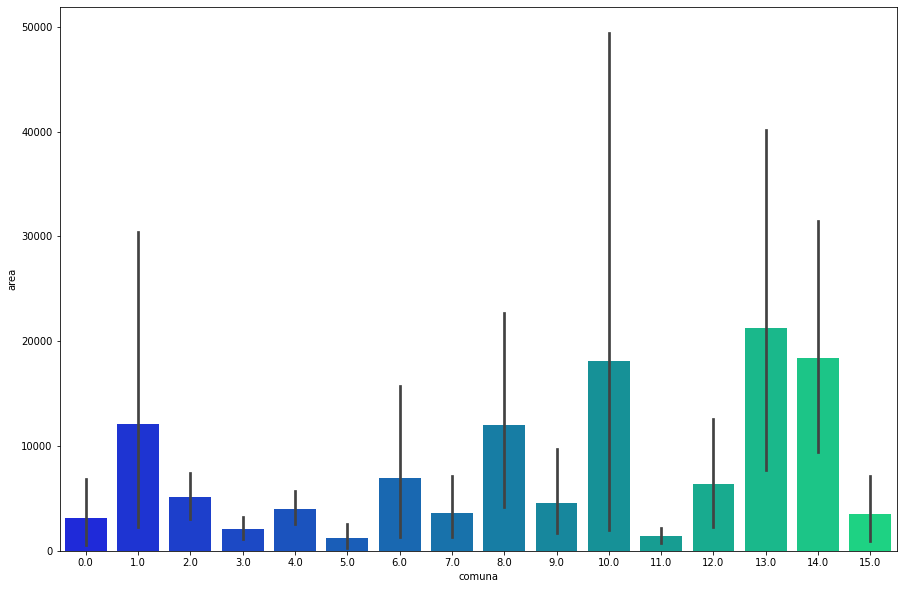

In [40]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'comuna', y = 'area', data = evt, palette="winter")

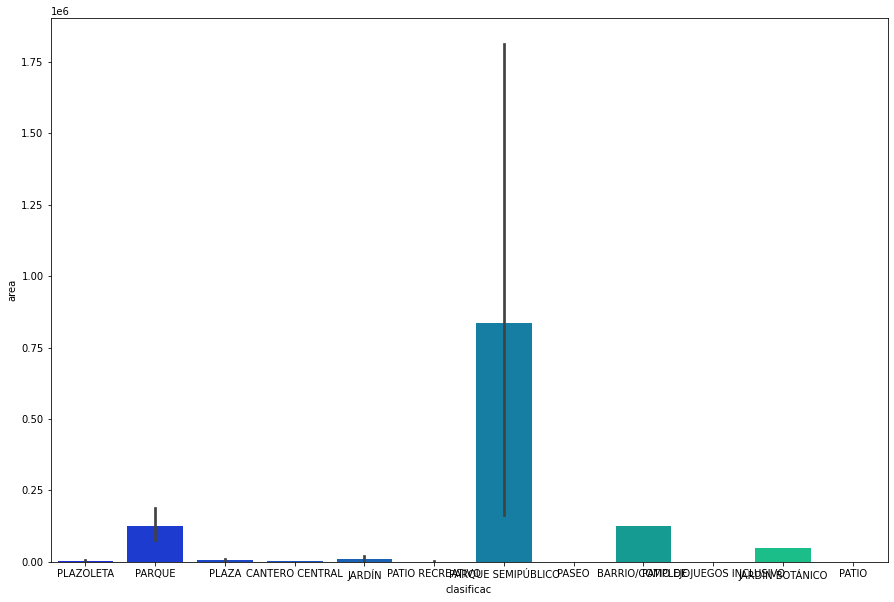

In [41]:
fig = plt.figure(figsize = (15,10))
sns.barplot(x = 'clasificac', y = 'area', data = evt, palette="winter")

In [53]:
evt.groupby(["clasificac"]).area.sum()


clasificac
BARRIO/COMPLEJO               124739.144
CANTERO CENTRAL              1112466.599
JARDÍN                        294967.606
JARDÍN BOTÁNICO                49868.072
PARQUE                       7015027.959
PARQUE SEMIPÚBLICO           3337706.205
PASEO                           1059.347
PATIO                           1515.590
PATIO DE JUEGOS INCLUSIVO       1312.427
PATIO RECREATIVO               14525.283
PLAZA                        2502148.914
PLAZOLETA                    1824483.321
Name: area, dtype: float64

([<matplotlib.patches.Wedge at 0x7efe27cabb38>,
 [Text(1.0996813251131519, 0.026476087274799515, 'BARRIO/COMPLEJO'),
  Text(1.0622270412103185, 0.28578613143673126, 'CANTERO CENTRAL'),
  Text(0.9466206137096375, 0.5602761941221397, 'JARDÍN'),
  Text(0.907269671355933, 0.6219821086154308, 'JARDÍN BOTÁNICO'),
  Text(-0.4217799922440328, 1.0159240316788571, 'PARQUE'),
  Text(-0.7500142943325898, -0.8046605236351461, 'PARQUE SEMIPÚBLICO'),
  Text(-0.11634436626756388, -1.093829963219969, 'PASEO'),
  Text(-0.1158008304300679, -1.0938876394181016, 'PATIO'),
  Text(-0.11520383976242721, -1.0939506731585265, 'PATIO DE JUEGOS INCLUSIVO'),
  Text(-0.11185989073933589, -1.0942976582465047, 'PATIO RECREATIVO'),
  Text(0.4118785956783745, -1.0199784421359162, 'PLAZA'),
  Text(1.0325237895240291, -0.3793344488270723, 'PLAZOLETA')])

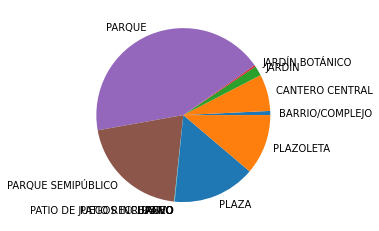

In [72]:
fig, ax = plt.subplots()
ax.pie(evt.groupby(["clasificac"]).area.sum(),labels = evt.groupby(["clasificac"]).area.sum().index)

In [117]:
evt.groupby(["comuna"]).area.sum()

comuna
0.0       19003.432
1.0     3242112.835
2.0      336135.186
3.0       45904.233
4.0      614307.522
5.0       20884.801
6.0      215695.441
7.0      342438.339
8.0     4168891.548
9.0      717913.744
10.0    1247864.288
11.0     118195.611
12.0    1014328.639
13.0    1746754.667
14.0    2220344.164
15.0     209046.017
Name: area, dtype: float64

([<matplotlib.patches.Wedge at 0x7efe233c1860>,
 [Text(1.099992603491233, 0.004033889510046634, '0.0'),
  Text(0.8868951309214684, 0.6507050228389141, '1.0'),
  Text(0.26927125888139125, 1.0665331636383517, '2.0'),
  Text(0.18998201386643754, 1.0834698124116116, '3.0'),
  Text(0.05077682665912863, 1.098827426793866, '4.0'),
  Text(-0.0839570090758265, 1.0967913295732428, '5.0'),
  Text(-0.13392503684421345, 1.091816873155144, '6.0'),
  Text(-0.25051663389303286, 1.071093560872674, '7.0'),
  Text(-0.9804931367187797, 0.4986313356051427, '8.0'),
  Text(-0.9794444979875423, -0.5006880020151585, '9.0'),
  Text(-0.7244021244554241, -0.8277931879910998, '10.0'),
  Text(-0.48367720441294304, -0.987955647755141, '11.0'),
  Text(-0.25797058537540213, -1.0693227656236786, '12.0'),
  Text(0.3209667958714257, -1.0521313206762883, '13.0'),
  Text(0.9604744525593181, -0.5361798448103757, '14.0'),
  Text(1.0991050810575609, -0.04436238038533153, '15.0')])

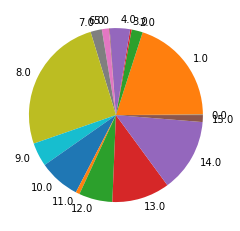

In [118]:
fig, ax = plt.subplots()
ax.pie(evt.groupby(["comuna"]).area.sum(),labels = evt.groupby(["comuna"]).area.sum().index)

Hago un gráfico de Area de EV en M2 por comuna

https://www.datacamp.com/community/tutorials/geospatial-data-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=1000073&gclid=Cj0KCQjwt4X8BRCPARIsABmcnOrWMSIaHzSoPH6EUAqAK2TPpsrLjKSR6wy41-uzoi5kBgnQXT49jBgaAuOgEALw_wcB

https://towardsdatascience.com/plotting-geographical-data-with-geopandas-338cc7e17e4e

https://geopandas.org/aggregation_with_dissolve.html

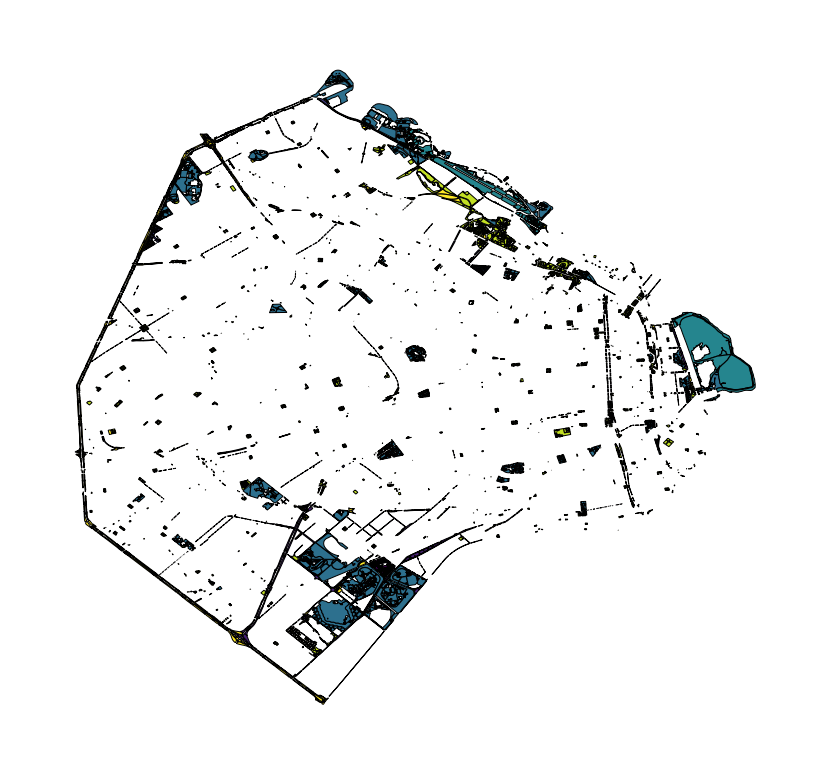

In [15]:
gplt.choropleth(ev, hue = ev['clasificac'], figsize = (18,14))

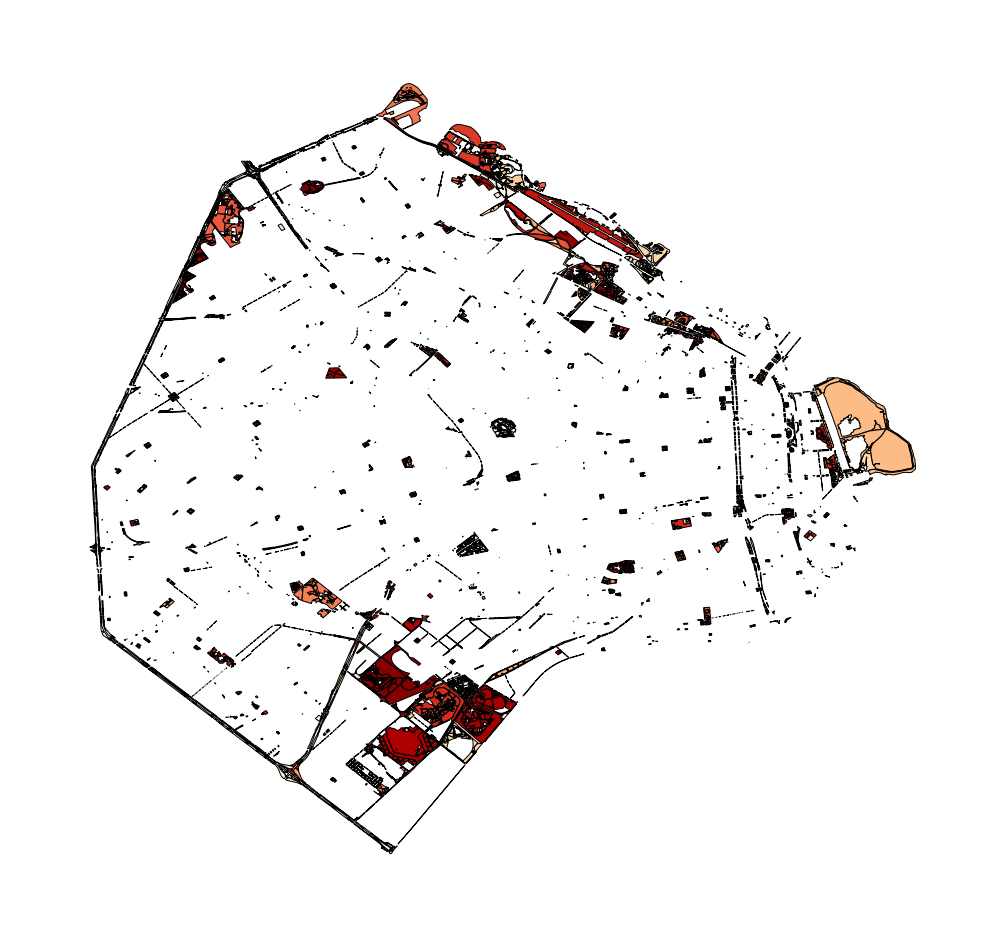

In [13]:
naranja = 'OrRd'
gplt.choropleth(ev, hue = ev['area'], cmap = naranja, figsize = (21,17))

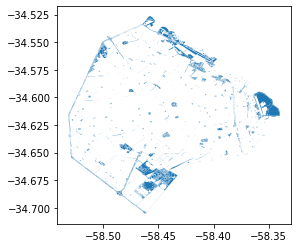

In [76]:
ev.plot()

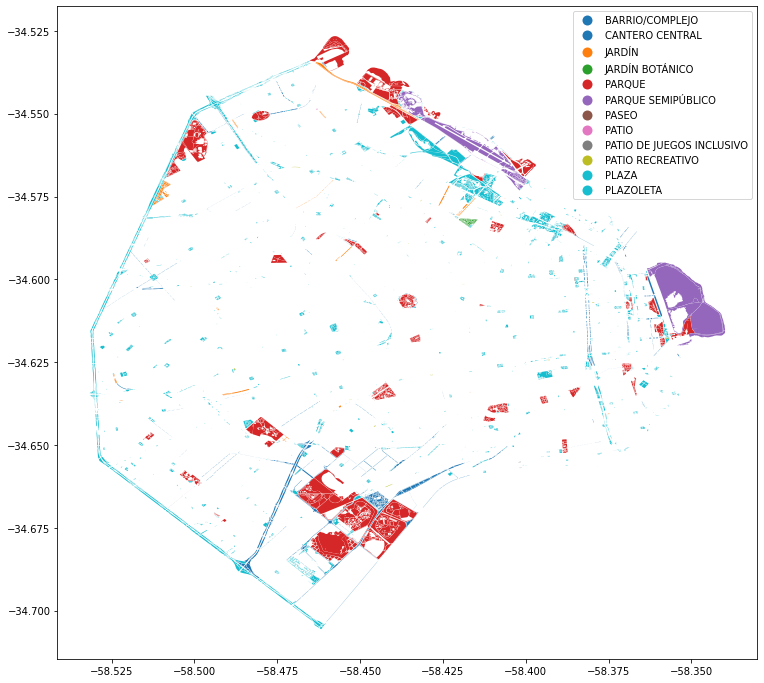

In [96]:
ev.plot(column='clasificac', legend=True, figsize= (15,12))

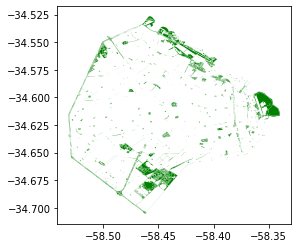

In [159]:
ev.plot(marker='*', color='green', markersize=14)

In [ ]:
Lo separo por Espacios con mayor suma total y menor suma total

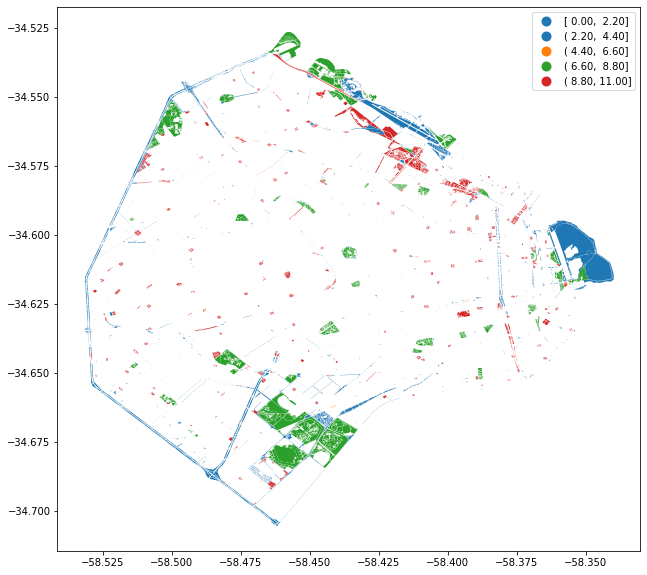

In [160]:
clasif = ev.dissolve(by='clasificac', aggfunc='sum')

clasif.plot(column = 'area', scheme='quantiles', legend=True, figsize = (12,10));

clasif.head()

NameError: ignored

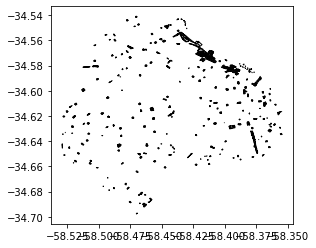

In [161]:

ax = ev[ev.clasificac == 'PLAZA'].plot(color='white', edgecolor='black')

gdf.plot(ax=ax, color='red', figsize = (18,12))

plt.show(figsize =(18,12))

Paso a graficar comunas

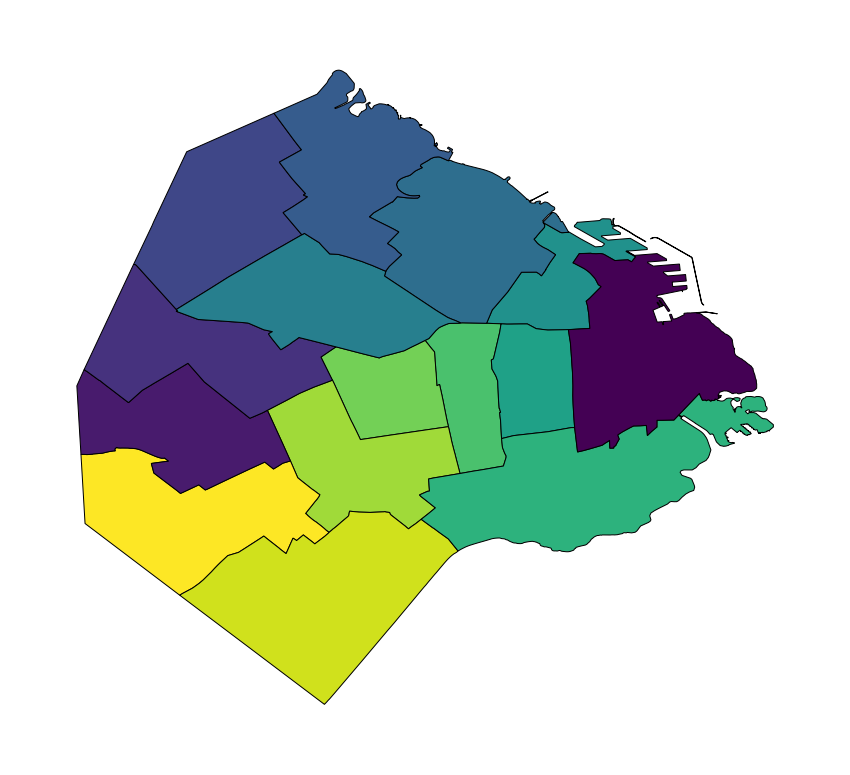

In [162]:
gplt.choropleth(com, hue = com['comuna'], figsize = (18,14))

Paso a mershearlo con espacios verdes

([<matplotlib.patches.Wedge at 0x7efe1ddd5d68>,
 [Text(1.099992603491233, 0.004033889510046634, '0.0'),
  Text(0.8868951309214684, 0.6507050228389141, '1.0'),
  Text(0.26927125888139125, 1.0665331636383517, '2.0'),
  Text(0.18998201386643754, 1.0834698124116116, '3.0'),
  Text(0.05077682665912863, 1.098827426793866, '4.0'),
  Text(-0.0839570090758265, 1.0967913295732428, '5.0'),
  Text(-0.13392503684421345, 1.091816873155144, '6.0'),
  Text(-0.25051663389303286, 1.071093560872674, '7.0'),
  Text(-0.9804931367187797, 0.4986313356051427, '8.0'),
  Text(-0.9794444979875423, -0.5006880020151585, '9.0'),
  Text(-0.7244021244554241, -0.8277931879910998, '10.0'),
  Text(-0.48367720441294304, -0.987955647755141, '11.0'),
  Text(-0.25797058537540213, -1.0693227656236786, '12.0'),
  Text(0.3209667958714257, -1.0521313206762883, '13.0'),
  Text(0.9604744525593181, -0.5361798448103757, '14.0'),
  Text(1.0991050810575609, -0.04436238038533153, '15.0')])

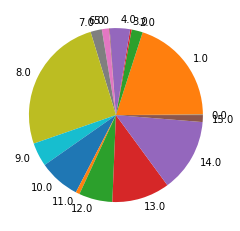

In [175]:
fig, ax = plt.subplots()
ax.pie(evxcom,labels = evxcom.index)

In [163]:
evxcom = evt.groupby(["comuna"]).area.sum()
evxcom

comuna
0.0       19003.432
1.0     3242112.835
2.0      336135.186
3.0       45904.233
4.0      614307.522
5.0       20884.801
6.0      215695.441
7.0      342438.339
8.0     4168891.548
9.0      717913.744
10.0    1247864.288
11.0     118195.611
12.0    1014328.639
13.0    1746754.667
14.0    2220344.164
15.0     209046.017
Name: area, dtype: float64

In [164]:
comev = pd.concat([evxcom, com], axis = 1)
comev.head(3)

,area,wkt,barrios,perimetro,areac,comuna,id,objeto,geometry
0.0,19003.432,MULTIPOLYGON (((-58.3800038855693 -34.57002352...,RECOLETA,21452.8386478,6317264.560990001,2,1,LIMITE COMUNAL,"MULTIPOLYGON (((-58.38000 -34.57002, -58.38002..."
1.0,3242112.835,MULTIPOLYGON (((-58.4128700313089 -34.61411625...,ALMAGRO - BOEDO,12323.4324792,6660603.119369999,5,2,LIMITE COMUNAL,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41282..."
2.0,336135.186,MULTIPOLYGON (((-58.4306058283309 -34.60704708...,CABALLITO,10990.9644715,6851028.913569999,6,3,LIMITE COMUNAL,"MULTIPOLYGON (((-58.43061 -34.60705, -58.43056..."


TypeError: ignored

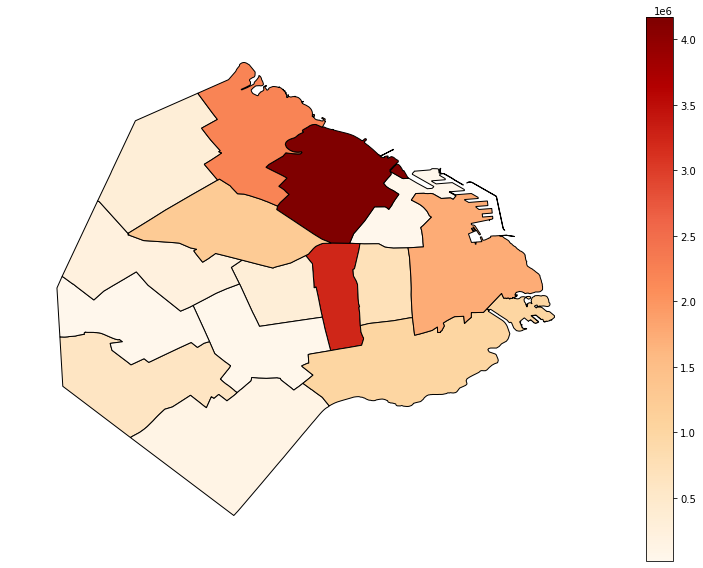

In [169]:
gplt.choropleth(comev, hue = comev['area'], cmap = 'OrRd', figsize = (15,10), legend = True)
